In [115]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from mpl_toolkits.mplot3d import Axes3D

### Problem 4.1
*Part A.1*

In [2]:
delt_H_bar_m = 9.9 #KJ/mol
Tm = 278.6 #K

delt_S_bar_v = delt_H_bar_m/Tm
print(delt_S_bar_v)

0.035534816941852114


*Part A.2*

In [3]:
delt_H_bar_v = 33.9 #KJ/mol
Tv = 353.1 #K

delt_S_bar_v = delt_H_bar_v/Tv
print(delt_S_bar_v)

0.09600679694137637


*Part B*

array([362.57993694, 808.68478217])

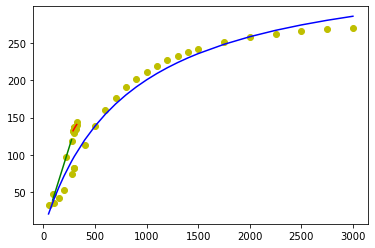

In [4]:
solid_df = pd.read_csv("./Cp_benzene_solid.txt",sep = '\t', header = None)
vapor_df = pd.read_csv("./Cp_benzene_vapor.txt",sep = '\t', header = None)
liquid_df = pd.read_csv("./Cp_benzene_liquid.txt",sep = '\t', header = None)

Ts_s = np.array(solid_df[0])
Cps_s = np.array(solid_df[1])
Ts_l = np.array(liquid_df[0])
Cps_l = np.array(liquid_df[1])
Ts_v = np.array(vapor_df[0])
Cps_v = np.array(vapor_df[1])

def process_input(Tin, Cpin):
    '''
    Takes in the data with repeated values e.g. for 298.15 and averages repeats into dictionary keys.
    Then outputs lists with averaged values sorted by first list.
    '''
    nodups = {}
    for i, j in enumerate(Tin):
        if j in nodups.keys():
            nodups[j] = (nodups[j] + Cpin[i]) / 2
        else:
            nodups[j] = Cpin[i]
    
    out = []
    a = list(nodups.keys())
    a.sort()
    for item in a:
        out.append(nodups[item])
        
    return (a, out)
    
a,b = process_input(Ts_l, Cps_l)

plt.scatter(Ts_l, Cps_l, color='y')

'''
test:
'''

def liquid_fit(T, a, b, c):
    Cp = a*(T**2) + b*T  + c
    return Cp

l_ig = [2.56e-4, -0.163, 101] #Initialize fit with values based on those water curve fit
l_popt, l_pcov = curve_fit(liquid_fit, Ts_l, Cps_l, l_ig)
smoother_ls = np.linspace(a[0], a[-1], 100)
plt.plot(smoother_ls, liquid_fit(smoother_ls, *l_popt), 'r')

def solid_fit(T, a):
    Cp = a*T
    return Cp

s_ig = [Cps_s[-1]/Ts_s[-1]]
s_popt, s_pcov = curve_fit(solid_fit, Ts_s, Cps_s, s_ig)

plt.plot(Ts_s, [solid_fit(x, *s_popt) for x in Ts_s], 'g')
plt.scatter(Ts_s, Cps_s, color='y')

def vapor_fit(T, a, b):
    Cp = (a * T)/(b + T)
    return Cp

v_ig = [228.3, 1387]
v_popt, v_pcov = curve_fit(vapor_fit, Ts_v, Cps_v, v_ig)
plt.plot(Ts_v, vapor_fit(Ts_v, *v_popt), 'b')


plt.scatter(Ts_v, Cps_v, color='y')
v_popt

### Problem 4D
*Part 3*

<IPython.core.display.Javascript object>


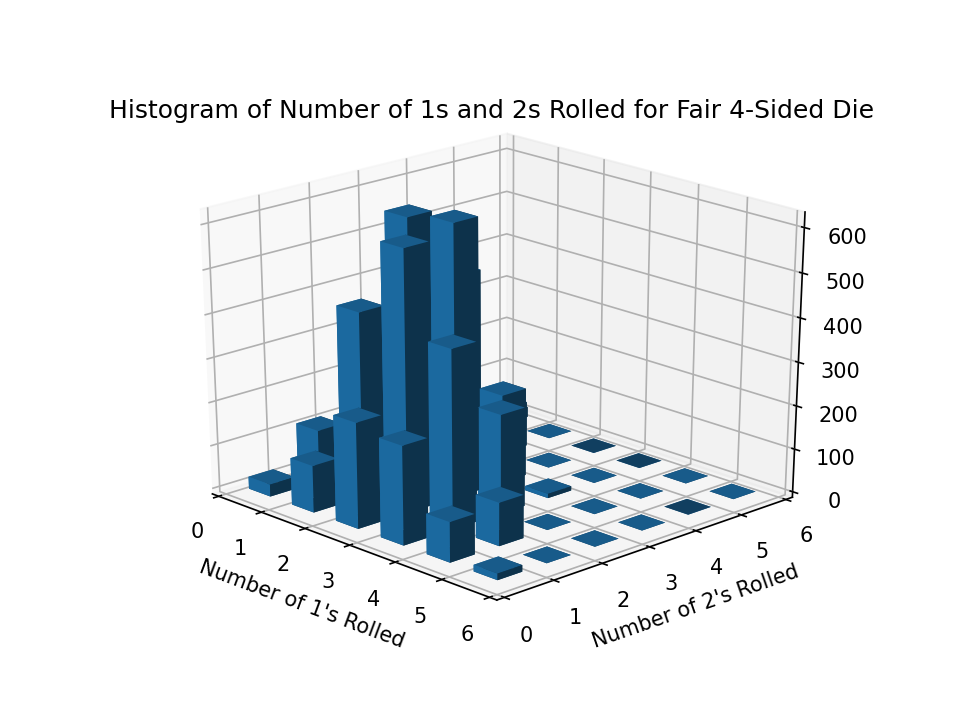

In [130]:
df_t = pd.read_csv("d3comps_true.csv")
trues = np.array(df_t)
x_trues = np.array([i[0:1][0] for i in trues]) #All the unbiased ones
y_trues = np.array([i[1:2][0] for i in trues]) #All the unbiased twos, threes can be implied because sum of all = 3

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hist, xedges, yedges = np.histogram2d(x_trues, y_trues, bins=6, range=[[0, 6], [0, 6]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.set_xlabel("Number of 1's Rolled")
ax.set_ylabel("Number of 2's Rolled")
ax.set_title("Histogram of Number of 1s and 2s Rolled for Fair 4-Sided Die")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average');

<IPython.core.display.Javascript object>


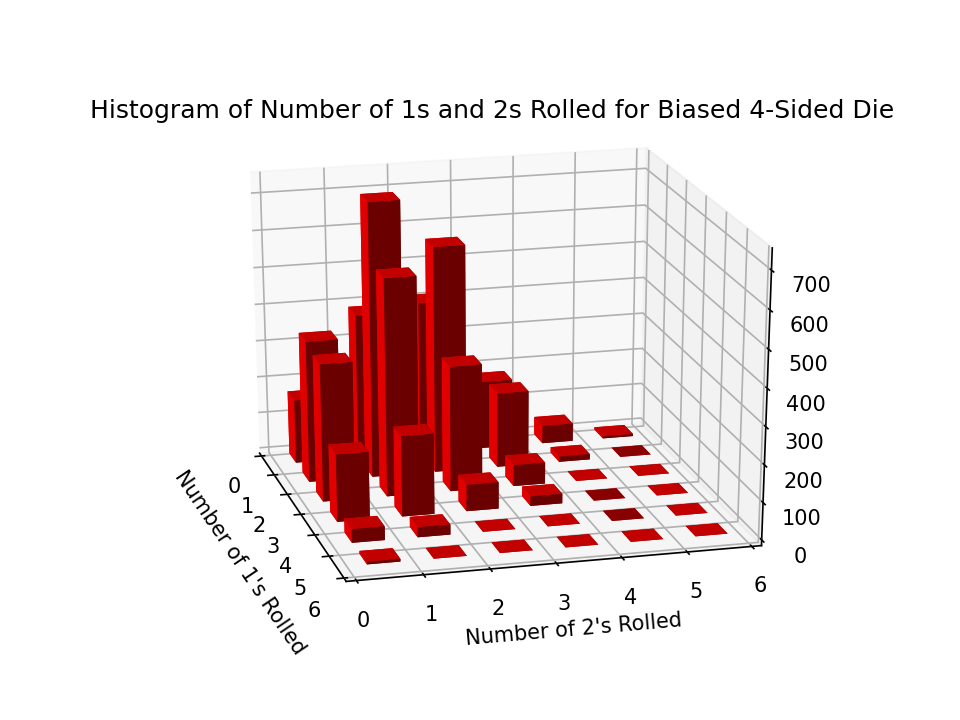

In [134]:
df_b = pd.read_csv("d3comps_biased.csv")
biased = np.array(df_b)
x_bias = np.array([i[0:1][0] for i in biased]) #All the biased ones
y_bias = np.array([i[1:2][0] for i in biased]) #All the biased twos, threes can be implied because sum of all = 3


fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")
hist2, xedges2, yedges2 = np.histogram2d(x_bias, y_bias, bins=6, range=[[0, 6], [0, 6]])
xpos2, ypos2 = np.meshgrid(xedges2[:-1] + 0.25, yedges2[:-1] + 0.25, indexing="ij")
xpos2 = xpos2.ravel()
ypos2 = ypos2.ravel()
zpos2 = 0
dx2 = dy2 = 0.5 * np.ones_like(zpos2)
dz2 = hist2.ravel()

ax2.set_xlabel("Number of 1's Rolled")
ax2.set_ylabel("Number of 2's Rolled")
ax2.set_title("Histogram of Number of 1s and 2s Rolled for Biased 4-Sided Die")
ax2.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, zsort='average', color = "red");